# 12.0 Portfolio assignment 12
30 min: Perform a bivariate analysis on at least 3 combinations of a numerical column with a categorical column in the dataset that you chose in portfolio assignment 4. Use <em>.groupby('columnname').mean()</em> to calculate the means. Is there a difference between categories? Then use seaborn barplots to check if there is a statistically significant difference. 

In [1]:
import pandas as pd
import seaborn as sns

chess = pd.read_csv("../assets/chess.csv", sep=',')
chess['combined_rating'] = chess['white_rating'] + chess['black_rating']

## 12.1 Numerical means grouped

In [2]:
chess.groupby('victory_status').mean()

,rated,created_at,last_move_at,turns,white_rating,black_rating,opening_ply,combined_rating
victory_status,,,,,,,,
draw,0.751656,1.486593e+12,1.486595e+12,83.781457,1658.154525,1641.241722,5.056291,3299.396247
mate,0.813597,1.482697e+12,1.482697e+12,65.415020,1529.353676,1523.439684,4.497708,3052.793360
outoftime,0.808929,1.481289e+12,1.481291e+12,72.742857,1612.629167,1609.745833,4.672024,3222.375000
resign,0.804611,1.484248e+12,1.484249e+12,53.912533,1627.395263,1618.524984,5.000538,3245.920248


In [3]:
chess.groupby('winner').mean()

,rated,created_at,last_move_at,turns,white_rating,black_rating,opening_ply,combined_rating
winner,,,,,,,,
black,0.810805,1.484049e+12,1.484050e+12,60.724388,1549.246184,1638.227298,4.742396,3187.473482
draw,0.756842,1.486773e+12,1.486774e+12,86.157895,1655.558947,1641.210526,5.056842,3296.769474
white,0.805119,1.482923e+12,1.482924e+12,57.790221,1634.184182,1538.876712,4.862114,3173.060894


## 12.2 Barplot mean and confidence

### 12.2.1 Turns vs Victory status

<AxesSubplot:xlabel='victory_status', ylabel='turns'>

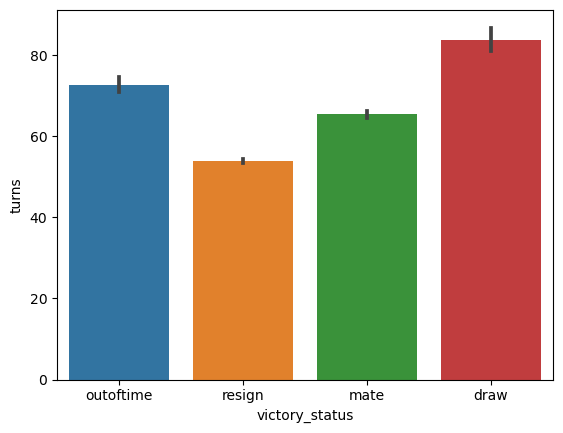

In [4]:
sns.barplot(y="turns", x="victory_status", data=chess) 

#### 12.2.1.1 Observaties
- Het kost vaak meer zetten om tot een gelijkspel te komen. 
    - Dit is logisch, naar mate er meer zetten worden gespeeld hoe minder materiaal er op het bord staat
- Spellen duren het kortst bij opgave. Dit is logisch omdat spelers vaak opgeven na een fout
    - Vaak word een belangrijk stuk op het bord geblunderd
    
### 12.2.2 Aantal theoretische zetten vs Victory status

<AxesSubplot:xlabel='victory_status', ylabel='opening_ply'>

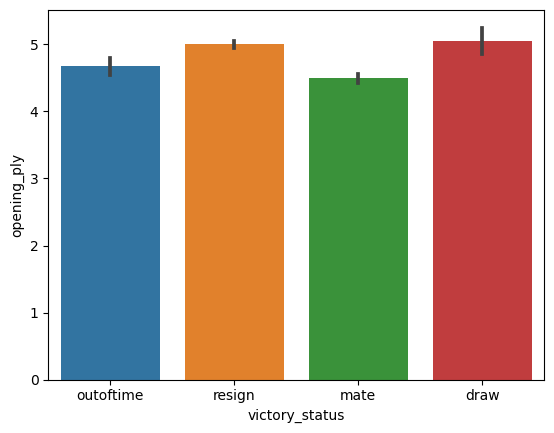

In [5]:
sns.barplot(y="opening_ply", x="victory_status", data=chess) 

#### 12.2.2.1 Observaties
- De meeste openingszetten resulteren het vaakst in een gelijkspel
- De confidence interval van gelijkspel is het grootst. Dit klopt ook aangezien er het minst vaak gelijk gespeeld word (assignment 6). Er is dus weinig data

### 12.2.3 Aantal zetten vs Winnaar

<AxesSubplot:xlabel='winner', ylabel='turns'>

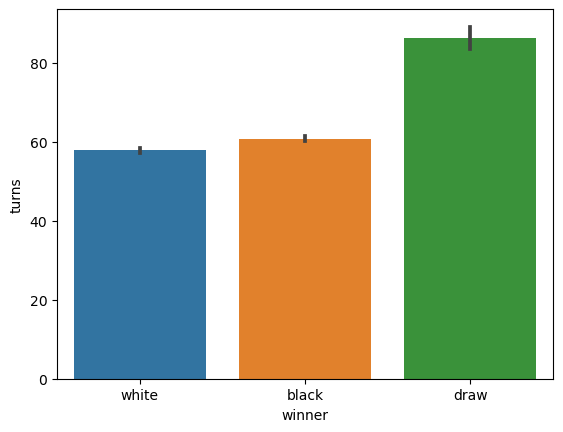

In [6]:
sns.barplot(y="turns", x="winner", data=chess) 

#### 12.2.3.1 Observaties
- Het kost vaak meer zetten om tot een gelijkspel te komen.
    - Dit is logisch, naar mate er meer zetten worden gespeeld hoe minder materiaal er op het bord staat
- Er is hier te concluderen dat zwart vaker meer zetten nodig heeft om het spel te winnen.
    - Dit is ook logisch, wit is namelijk als eerst aan zet
- Ook hier is weer te zien dat de confidence interval van gelijkspel een grotere spreiding kent (minder records)